In [4]:
import pandas as pd
from pyspark.sql import SparkSession

# Initialize Spark
spark = SparkSession.builder.appName("SparkDataframe").getOrCreate()

# Load datasets using pandas
url_airports = "https://raw.githubusercontent.com/databricks/LearningSparkV2/master/databricks-datasets/learning-spark-v2/flights/airport-codes-na.txt"
url_delays = "https://raw.githubusercontent.com/databricks/LearningSparkV2/master/databricks-datasets/learning-spark-v2/flights/departuredelays.csv"

df_airports_pd = pd.read_csv(url_airports, sep="\t")  # Tab-separated file
df_delays_pd = pd.read_csv(url_delays)  # Comma-separated file

# Convert to Spark DataFrame
df_airports = spark.createDataFrame(df_airports_pd)
df_delays = spark.createDataFrame(df_delays_pd)

# Show top 5 rows
df_airports.show(5)
df_delays.show(5)


+----------+-----+-------+----+
|      City|State|Country|IATA|
+----------+-----+-------+----+
|Abbotsford|   BC| Canada| YXX|
|  Aberdeen|   SD|    USA| ABR|
|   Abilene|   TX|    USA| ABI|
|     Akron|   OH|    USA| CAK|
|   Alamosa|   CO|    USA| ALS|
+----------+-----+-------+----+
only showing top 5 rows

+-------+-----+--------+------+-----------+
|   date|delay|distance|origin|destination|
+-------+-----+--------+------+-----------+
|1011245|    6|     602|   ABE|        ATL|
|1020600|   -8|     369|   ABE|        DTW|
|1021245|   -2|     602|   ABE|        ATL|
|1020605|   -4|     602|   ABE|        ATL|
|1031245|   -4|     602|   ABE|        ATL|
+-------+-----+--------+------+-----------+
only showing top 5 rows



In [5]:
df_joined = df_delays.join(df_airports, df_delays.origin == df_airports.IATA, "inner")
df_joined.select("City", "State", "Country", "origin", "destination", "delay", "distance").show(5)


+-----------+-----+-------+------+-----------+-----+--------+
|       City|State|Country|origin|destination|delay|distance|
+-----------+-----+-------+------+-----------+-----+--------+
|New Orleans|   LA|    USA|   MSY|        DFW|   -4|     389|
|New Orleans|   LA|    USA|   MSY|        DFW|   -2|     389|
|New Orleans|   LA|    USA|   MSY|        MIA|  -12|     586|
|New Orleans|   LA|    USA|   MSY|        DFW|   -1|     389|
|New Orleans|   LA|    USA|   MSY|        MIA|   -4|     586|
+-----------+-----+-------+------+-----------+-----+--------+
only showing top 5 rows



In [6]:
# COMPUTE THE AVERAGE DELAY PER CITY and THIS WILL SHOW THE CITIES WITH HIGHEST AVERAGE FLIGHT DELAYS
from pyspark.sql.functions import avg

df_avg_delay = df_joined.groupBy("City").agg(avg("delay").alias("Avg_Delay")).orderBy("Avg_Delay", ascending=False)
df_avg_delay.show(10)


+-------------+------------------+
|         City|         Avg_Delay|
+-------------+------------------+
|    La Crosse|26.532467532467532|
|    Marquette| 23.87012987012987|
|         Vail| 20.57012542759407|
|      Roanoke|19.885106382978723|
|      Chicago|18.843232404726876|
|   Burlington|  18.7246192893401|
|State College| 17.91616766467066|
|     Gunnison| 17.73061224489796|
|        Islip|17.697810218978102|
|     Waterloo|17.161676646706585|
+-------------+------------------+
only showing top 10 rows



<ipython-input-8-85d5ed14c722>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_avg_delay_pd, x="Avg_Delay", y="City", palette="coolwarm")


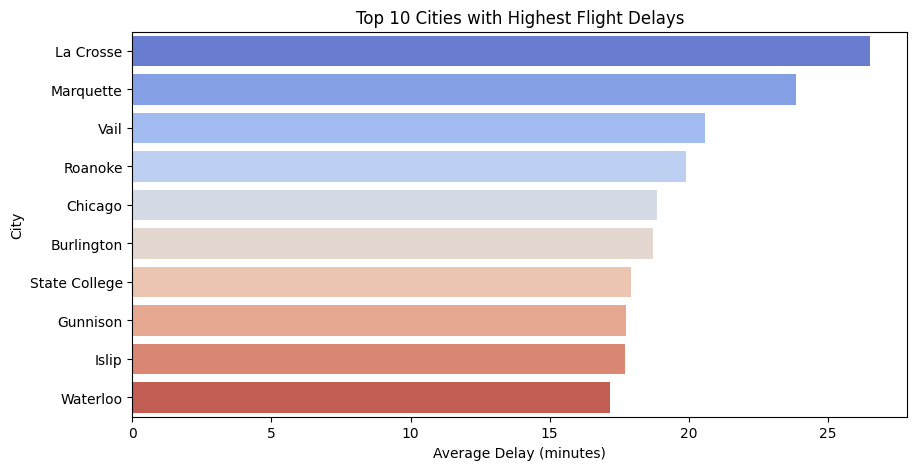

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Spark DataFrame to Pandas for visualization
df_avg_delay_pd = df_avg_delay.limit(10).toPandas()

plt.figure(figsize=(10,5))
sns.barplot(data=df_avg_delay_pd, x="Avg_Delay", y="City", palette="coolwarm")
plt.xlabel("Average Delay (minutes)")
plt.ylabel("City")
plt.title("Top 10 Cities with Highest Flight Delays")
plt.show()


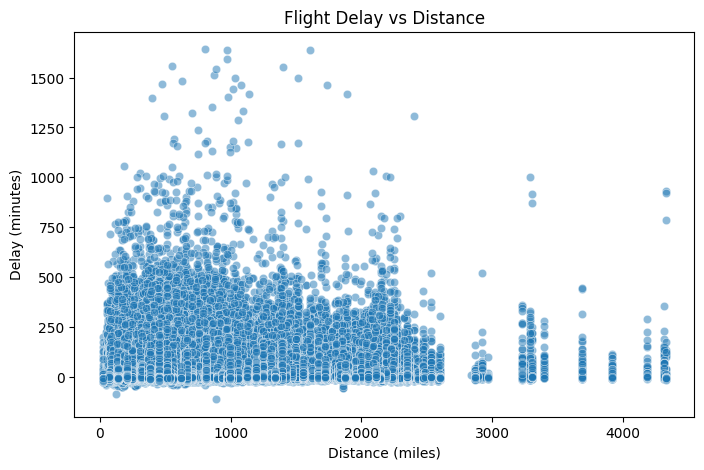

In [9]:
df_delays_pd = df_delays.toPandas()

plt.figure(figsize=(8,5))
sns.scatterplot(data=df_delays_pd, x="distance", y="delay", alpha=0.5)
plt.xlabel("Distance (miles)")
plt.ylabel("Delay (minutes)")
plt.title("Flight Delay vs Distance")
plt.show()


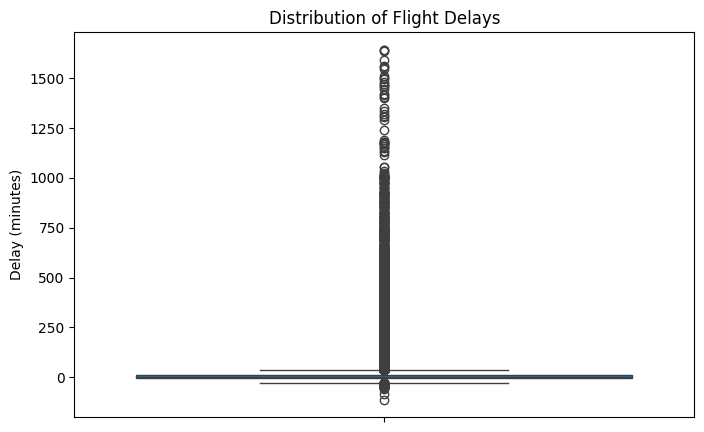

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_delays_pd, y="delay")
plt.ylabel("Delay (minutes)")
plt.title("Distribution of Flight Delays")
plt.show()
